# Manipulating Opera Phenix Analysis Data 
#### (Example: Determining Nuclear Count from Text File Data)

* Python is a relatively user-friendly, readable programming language
* Importing Opera Phenix text file data and manipulating it into something useful takes only a few lines of code
* Although Python is well equipped to manipulate data from a text file to an excel file, it is capable of much much more!

In [14]:
from helperFunctions import get_file, get_folder, saveas_filename
import pandas as pd
import os
from matplotlib import pyplot as plt

In [15]:
#select a file
filename = get_file() 

In [4]:
filename

'R:/BM_JM_PredictiveBiology/Boekelheide Lab/Sam/2019-5-2 MCF7 plate for corteva/2019-5-2 MCF7 corteva__2019-05-02T17_30_59-Measurement 3b/Evaluation4/Objects_Population - Nuclei.txt'

In [16]:
#import data into a dataframe, the separator in this example is a tab (\t) and the headers are on row 9 (python is 0 indexed so row 1 in the text file is row 0 to python)
data = pd.read_csv(filename, sep='\t', header=8) 

In [17]:
#preview the first 5 rows of the dataframe to make sure it imported correctly
data.head()

,Row,Column,Plane,Timepoint,Field,Object No,X,Y,Bounding Box,Position X [µm],Position Y [µm],Compound,Concentration,Cell Type,Cell Count,Nuclei - ROI No,Unnamed: 16
0,1,1,64,0,1,1,543,372,"[536,366,552,383]",498.07,-374.78,PPT,0.01,MCF7,NaN,1,NaN
1,1,1,64,0,1,2,501,380,"[489,374,508,388]",472.09,-378.60,PPT,0.01,MCF7,NaN,1,NaN
2,1,1,64,0,1,3,536,398,"[528,390,545,407]",493.60,-388.91,PPT,0.01,MCF7,NaN,1,NaN
3,1,1,64,0,1,4,482,403,"[476,396,488,415]",461.76,-392.67,PPT,0.01,MCF7,NaN,1,NaN
4,1,1,64,0,1,5,587,410,"[581,404,596,417]",524.35,-395.57,PPT,0.01,MCF7,NaN,1,NaN


In [18]:
#group the data you are interested in. In this example, each instance of the nuclei - ROI No column is summed to get the total number of nuclei
#the groupby function essentially splits the data into groups that you specify and then can perform calculations on those groups
#if you want to get the sum of variable1 when variable2,3,4 are grouped together then you would use data.groupby(['variable2', 'variable3', 'variable4'])['variable1'].sum()
extracted_data = data.groupby(['Row', 'Column', 'Field', 'Concentration', 'Cell Type', 'Compound'], as_index=False)['Nuclei - ROI No'].sum()

In [19]:
extracted_data.head()

,Row,Column,Field,Concentration,Cell Type,Compound,Nuclei - ROI No
0,1,1,1,0.01,MCF7,PPT,398
1,1,1,2,0.01,MCF7,PPT,357
2,1,1,3,0.01,MCF7,PPT,356
3,1,1,4,0.01,MCF7,PPT,432
4,1,2,1,0.01,MCF7,PPT,389


In [21]:
#rename the Nuclei - ROI No column to Nuclear Count
extracted_data.rename(columns = {'Nuclei - ROI No':'Nuclear Count'}, inplace = True)

In [22]:
extracted_data.head()

,Row,Column,Field,Concentration,Cell Type,Compound,Nuclear Count
0,1,1,1,0.01,MCF7,PPT,398
1,1,1,2,0.01,MCF7,PPT,357
2,1,1,3,0.01,MCF7,PPT,356
3,1,1,4,0.01,MCF7,PPT,432
4,1,2,1,0.01,MCF7,PPT,389


In [23]:
grouped = extracted_data.groupby(['Compound', 'Concentration'])['Nuclear Count']

In [24]:
summary = grouped.aggregate(['mean', 'std'])
summary.head()

mean        std
Compound     Concentration                       
DMSO control 0.0            347.269231  73.270762
DPN          0.1            323.214286  49.264090
             1.0            349.375000  90.305315
             3.0            335.250000  58.138341
             10.0           374.812500  58.699482

In [25]:
means = grouped.mean()
means.head()

Compound      Concentration
DMSO control  0.0              347.269231
DPN           0.1              323.214286
              1.0              349.375000
              3.0              335.250000
              10.0             374.812500
Name: Nuclear Count, dtype: float64

In [26]:
stds = grouped.std()
stds.head()

Compound      Concentration
DMSO control  0.0              73.270762
DPN           0.1              49.264090
              1.0              90.305315
              3.0              58.138341
              10.0             58.699482
Name: Nuclear Count, dtype: float64

In [27]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

C:\Users\spetren\AppData\Local\Continuum\anaconda3\envs\CAPB\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


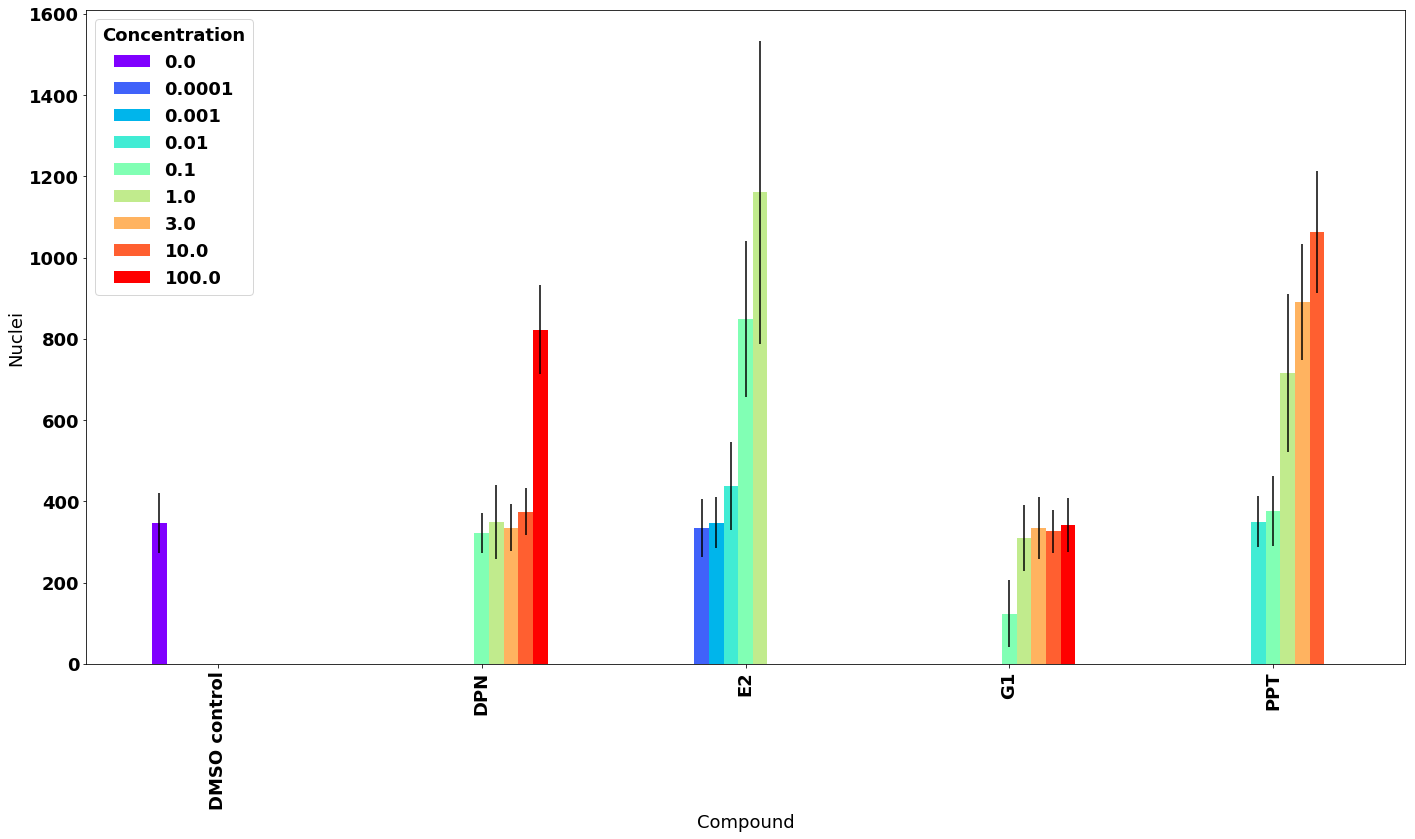

In [28]:
fig, ax = plt.subplots(figsize=(20,12));
ax = means.unstack().plot(kind='bar', ax=ax, yerr=stds.unstack(), colormap='rainbow')
ax.set_ylabel('Nuclei')
fig.tight_layout()
#plt.legend(loc='upper left')
plt.show()


In [29]:
compounds = extracted_data['Compound'].unique()

C:\Users\spetren\AppData\Local\Continuum\anaconda3\envs\CAPB\lib\site-packages\matplotlib\ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


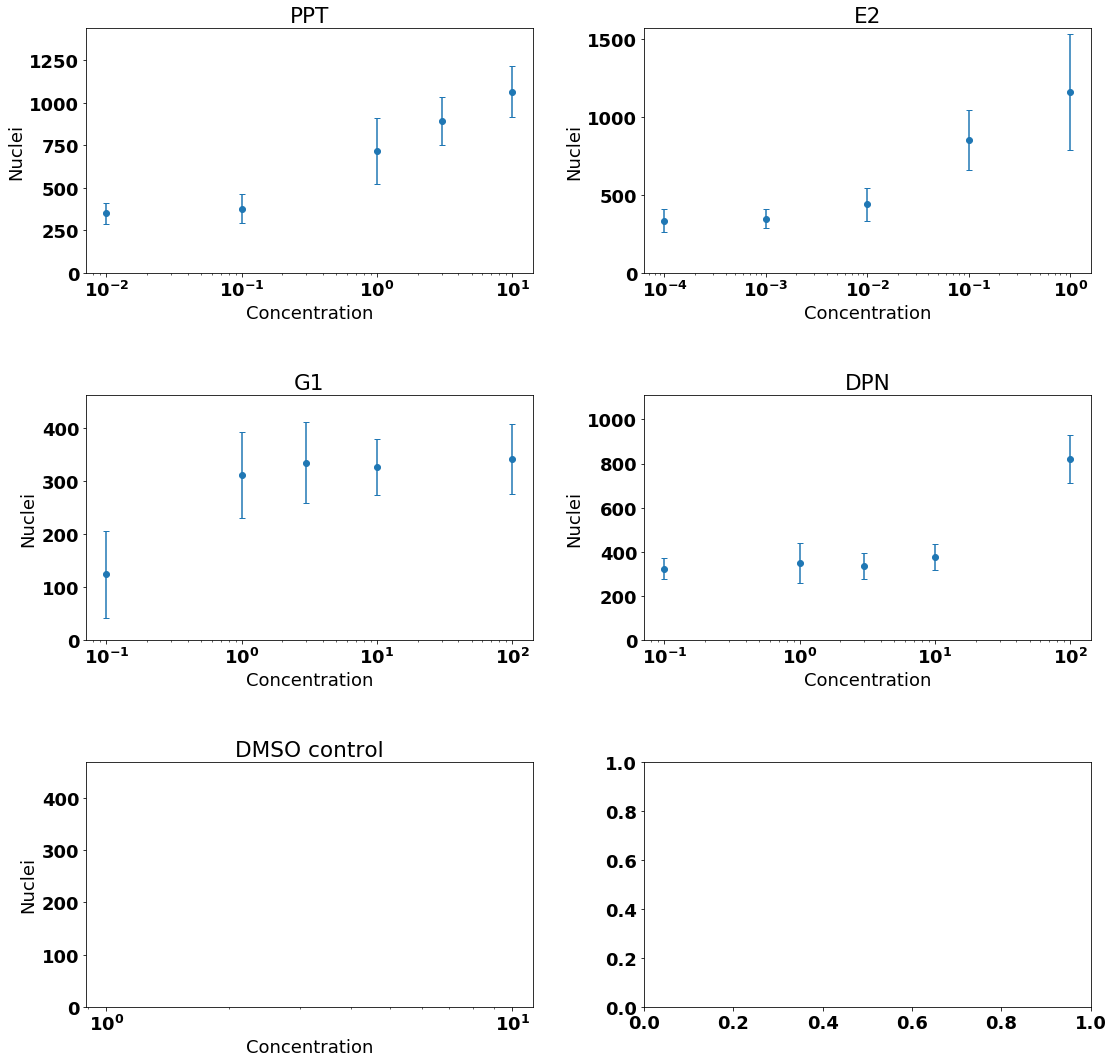

In [30]:
fig, axs = plt.subplots(int(pd.np.ceil(len(compounds)/2)),int(pd.np.floor(len(compounds)/2)), figsize=(18, 18), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.25)
axs = axs.ravel()
for inx,compound in enumerate(compounds):
    ax = axs[inx]
    x = means[compound].reset_index()['Concentration'].tolist()
    y = means[compound].reset_index()['Nuclear Count'].tolist()
    err = stds[compound].reset_index()['Nuclear Count'].tolist()
    ax.errorbar(x,y, yerr=err, linestyle='none', marker='o', capsize=3)
    ax.set_xscale('log')
    ax.set_title(compound)
    ax.set_ylabel('Nuclei')
    ax.set_xlabel('Concentration')
    ax.set_ylim(0,max(y)*1.35)

In [31]:
data.head()

,Row,Column,Plane,Timepoint,Field,Object No,X,Y,Bounding Box,Position X [µm],Position Y [µm],Compound,Concentration,Cell Type,Cell Count,Nuclei - ROI No,Unnamed: 16
0,1,1,64,0,1,1,543,372,"[536,366,552,383]",498.07,-374.78,PPT,0.01,MCF7,NaN,1,NaN
1,1,1,64,0,1,2,501,380,"[489,374,508,388]",472.09,-378.60,PPT,0.01,MCF7,NaN,1,NaN
2,1,1,64,0,1,3,536,398,"[528,390,545,407]",493.60,-388.91,PPT,0.01,MCF7,NaN,1,NaN
3,1,1,64,0,1,4,482,403,"[476,396,488,415]",461.76,-392.67,PPT,0.01,MCF7,NaN,1,NaN
4,1,1,64,0,1,5,587,410,"[581,404,596,417]",524.35,-395.57,PPT,0.01,MCF7,NaN,1,NaN


In [32]:
extracted_data.head()

,Row,Column,Field,Concentration,Cell Type,Compound,Nuclear Count
0,1,1,1,0.01,MCF7,PPT,398
1,1,1,2,0.01,MCF7,PPT,357
2,1,1,3,0.01,MCF7,PPT,356
3,1,1,4,0.01,MCF7,PPT,432
4,1,2,1,0.01,MCF7,PPT,389


In [33]:
summary.head()

mean        std
Compound     Concentration                       
DMSO control 0.0            347.269231  73.270762
DPN          0.1            323.214286  49.264090
             1.0            349.375000  90.305315
             3.0            335.250000  58.138341
             10.0           374.812500  58.699482

In [34]:
summary.rename(columns={'mean':'Average Nuclear Count', 'std':'Standard Deviation'}, inplace=True)
summary.head()

Average Nuclear Count  Standard Deviation
Compound     Concentration                                           
DMSO control 0.0                       347.269231           73.270762
DPN          0.1                       323.214286           49.264090
             1.0                       349.375000           90.305315
             3.0                       335.250000           58.138341
             10.0                      374.812500           58.699482

In [35]:
summary.reset_index(inplace=True)
summary

,Compound,Concentration,Average Nuclear Count,Standard Deviation
0,DMSO control,0.0000,347.269231,73.270762
1,DPN,0.1000,323.214286,49.264090
2,DPN,1.0000,349.375000,90.305315
3,DPN,3.0000,335.250000,58.138341
4,DPN,10.0000,374.812500,58.699482
5,DPN,100.0000,822.437500,109.075490
6,E2,0.0001,334.562500,71.255380
7,E2,0.0010,347.625000,62.740604
8,E2,0.0100,438.125000,107.700124
9,E2,0.1000,849.000000,192.815283


In [36]:
suggested = os.path.split(os.path.splitext(filename)[0])[1].replace(" ", "")+'.xlsx'
suggested

'Objects_Population-Nuclei.xlsx'

In [37]:
savefilename = saveas_filename()

In [38]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(savefilename, engine='xlsxwriter')

In [39]:
summary.to_excel(writer, sheet_name='summary')
extracted_data.to_excel(writer, sheet_name='binned_data')
data.to_excel(writer, sheet_name='raw_data')

In [40]:
sheet3 = writer.sheets['raw_data']
sheet2 = writer.sheets['binned_data']
sheet1 = writer.sheets['summary']

In [41]:
def get_column_width(dataframe):
    return [max([len(str(i))*1.25 for i in dataframe.index.values])]+[len(str(i))*1.25 for i in dataframe.columns]

column_widths_3 = get_column_width(data)
column_widths_2 = get_column_width(extracted_data)
column_widths_1 = get_column_width(summary)


In [42]:
[sheet1.set_column(i,i,width) for i, width in enumerate(column_widths_1)]
[sheet2.set_column(i,i,width) for i, width in enumerate(column_widths_2)]
[sheet3.set_column(i,i,width) for i, width in enumerate(column_widths_3)];

In [43]:
writer.save()